## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
base_path = r'..\Dataset'

gen_path_normal = os.path.join(base_path, r'Generated\normal.npy')
gen_path_patient = os.path.join(base_path, r'Generated\patient.npy')

real_path_normal = os.path.join(base_path, r'Real\normal_cls.npy')
real_path_patient = os.path.join(base_path, r'Real\patient_cls.npy')

gen_path_normal,gen_path_patient,real_path_normal,real_path_patient,

('..\\Dataset\\Generated\\normal.npy',
 '..\\Dataset\\Generated\\patient.npy',
 '..\\Dataset\\Real\\normal_cls.npy',
 '..\\Dataset\\Real\\patient_cls.npy')

In [3]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)
    for k in k_vals:
        lm_sum = 0
        for m in range(k):
            num_windows = int(np.floor((n - m) / k))
            temp_sum = 0
            for i in range(num_windows):
                start_index = i * k + m
                end_index = start_index + k
                temp_sum += np.abs(sig[start_index:end_index].mean())
            lm_sum += (1 / (num_windows * k)) * temp_sum
        lk[k - 1] = (lm_sum * (n / k)**2) / ((n - 1) / k)
    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [4]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [5]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

In [6]:
from tqdm import tqdm

def create_dataset(file_path: str, dataset: list, func, classification:int, **kwargs):
    control = np.load(file_path)
    for signal in tqdm(control):
        partial_signal = []
        for channel in signal:
            partial_signal.append(func(channel, **kwargs))
        partial_signal.append(classification)
        partial_signal
        dataset.append(partial_signal)
    return dataset

In [7]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print(p)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

## Higuchi

***To use machine learning models with the actual data***

In [93]:
use_existing = False

In [94]:



if not use_existing:
    dataset_hfd = []
    create_dataset(real_path_patient, dataset_hfd, higuchi_fd, 1, kmax=6)
    create_dataset(real_path_normal, dataset_hfd, higuchi_fd, 0, kmax=6)

    dataset_hfd = np.asarray(dataset_hfd)
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])
    # np.save(r'training_data_MLProject\higuchi_real_only',dataset_hfd)
else:
    dataset_hfd = np.load(r'training_data_MLProject\higuchi_real_only.npy')
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])


100%|██████████| 99/99 [00:13<00:00,  7.51it/s]

Dataset shape: (199, 20)
[0.71001617 0.61098283 0.56392274 0.570736   0.51022778 0.57786614
 0.46335746 0.51781175 0.71271995 0.57837615 0.54883396 0.58417097
 0.51252851 0.55389208 0.46388468 0.49626271 0.60208266 0.60870427
 0.56441713 1.        ]


**Generated Data Higuchi**

In [95]:
use_existing = False

In [96]:
generated_hfd = []
create_dataset(gen_path_patient, generated_hfd, higuchi_fd, 1, kmax=6)
create_dataset(gen_path_normal, generated_hfd, higuchi_fd, 0, kmax=6)


generated_hfd = np.asarray(generated_hfd)
print(generated_hfd[0])

100%|██████████| 2000/2000 [07:09<00:00,  4.65it/s]

[0.56597849 0.58876952 0.59450068 0.62708133 0.59704109 0.55459463
 0.5342423  0.57837655 0.59295132 0.57290404 0.58549794 0.64769236
 0.61837887 0.5461994  0.58566156 0.56652684 0.60257117 0.61904722
 0.63998208 1.        ]


In [97]:
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

X_test_hfd, y_test_hfd = X, y

In [98]:
X = generated_hfd[:, :-1]
y = generated_hfd[:, -1]

X_train_hfd, y_train_hfd = X, y

In [99]:
X_train_hfd.shape, X_test_hfd.shape, y_train_hfd.shape, y_test_hfd.shape

((4000, 19), (199, 19), (4000,), (199,))

### Logistic Regression

In [100]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
# lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

LogisticRegression()
Training Accuracy: 0.8855
Training Precision: 0.887
Training Recall: 0.8843469591226321
Training F1: 0.8856714927608587
Test Accuracy: 0.7336683417085427
Test Precision: 0.62
Test Recall: 0.8051948051948052
Test F1: 0.7005649717514124


### Random Forest

In [101]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
# rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.88425
Training Precision: 0.9785
Training Recall: 0.8233066891039125
Training F1: 0.8942197852410326
Test Accuracy: 0.7487437185929648
Test Precision: 0.78
Test Recall: 0.7358490566037735
Test F1: 0.7572815533980582


In [102]:
rf_classifier.feature_importances_

array([0.07871146, 0.01338192, 0.02030898, 0.03879935, 0.01858762,
       0.00699132, 0.0611628 , 0.00374229, 0.16424562, 0.02432447,
       0.04933992, 0.07720299, 0.11583271, 0.06490075, 0.07823458,
       0.154333  , 0.0045402 , 0.00453845, 0.02082156])

### Decision Tree

In [103]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6733668341708543
Test Precision: 0.51
Test Recall: 0.7611940298507462
Test F1: 0.6107784431137725


### Naive Bayes

In [104]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
# nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

GaussianNB()
Training Accuracy: 0.679
Training Precision: 0.7595
Training Recall: 0.6541774332472007
Training F1: 0.7029153169828783
Test Accuracy: 0.6633165829145728
Test Precision: 0.78
Test Recall: 0.6341463414634146
Test F1: 0.6995515695067265


### SVM

In [105]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.988
Training Precision: 0.9865
Training Recall: 0.9894684052156469
Training F1: 0.9879819729594391
Test Accuracy: 0.7085427135678392
Test Precision: 0.61
Test Recall: 0.7625
Test F1: 0.6777777777777778


In [106]:
from sklearn.metrics import confusion_matrix
y_pred = dt_classifier.predict(X_test_hfd)
conf_mat = confusion_matrix(y_test_hfd, y_pred)

In [107]:
print(conf_mat)

[[83 16]
 [49 51]]


In [108]:
y_test_hfd

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

***SVM - using Regularization***

In [109]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.98425
Training Precision: 0.983
Training Recall: 0.9854636591478697
Training F1: 0.9842302878598248
Test Accuracy: 0.6884422110552764
Test Precision: 0.58
Test Recall: 0.7435897435897436
Test F1: 0.651685393258427


In [110]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.9855
Training Precision: 0.983
Training Recall: 0.9879396984924623
Training F1: 0.9854636591478697
Test Accuracy: 0.6984924623115578
Test Precision: 0.6
Test Recall: 0.75
Test F1: 0.6666666666666666


### K Nearest Neighbors

In [111]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.9885
Training Precision: 0.986
Training Recall: 0.9909547738693467
Training F1: 0.9884711779448622
Test Accuracy: 0.7437185929648241
Test Precision: 0.77
Test Recall: 0.7333333333333333
Test F1: 0.751219512195122


### Ensemble

In [112]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [113]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



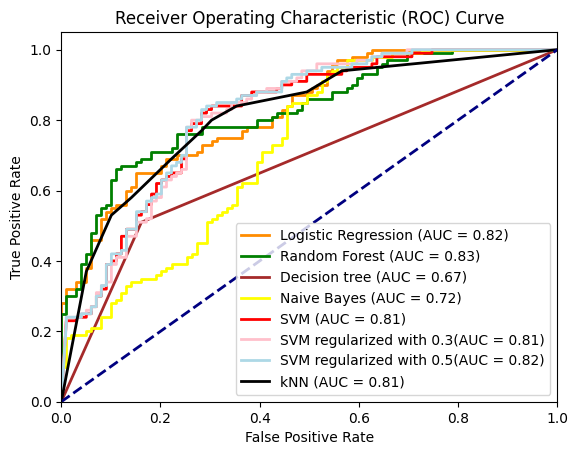

In [114]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ***Entropy***

**Real Data**

In [115]:

dataset_ent = []
create_dataset(real_path_patient, dataset_ent, shannonentropy, 1)
create_dataset(real_path_normal, dataset_ent, shannonentropy, 0)


dataset_ent = np.asarray(dataset_ent)
print(dataset_ent[0], '\n', dataset_ent.shape)
# np.save(r'training_data_MLProject\ent_real_only.npy', dataset_ent)



100%|██████████| 99/99 [00:00<00:00, 496.30it/s]

[  1.16277228  -7.1303388  -14.64062007 -13.14312842 -26.33111495
 -14.23590135 -52.81113963 -27.54122516   1.28634575 -12.58210755
 -17.96553375 -11.24755785 -24.37974699 -20.98237618 -66.35449394
 -35.11989856  -7.3991824   -7.54366634 -13.55379844   1.        ] 
 (199, 20)


**Generated Data**

In [116]:
use_existing = False

In [117]:

generated_ent = []
create_dataset(gen_path_patient, generated_ent, shannonentropy, 1)
create_dataset(gen_path_normal, generated_ent, shannonentropy, 0)


generated_ent = np.asarray(generated_ent)
print(generated_ent[0], '\n', generated_ent.shape)




100%|██████████| 2000/2000 [00:03<00:00, 530.42it/s]

[-12.22107353  -8.99821573  -8.1217978   -4.25645417  -7.3799257
 -13.61656646 -17.48881499 -11.04524005  -8.44776321 -12.166855
  -8.83547825  -2.77004331  -5.18966138 -20.29139043 -10.08880118
 -10.98162752  -8.65193995  -5.08200858  -3.52877959   1.        ] 
 (4000, 20)


In [118]:
# # Extract features (X) and output variable (y)
# X1 = dataset_ent[:, :-1]
# y1 = dataset_ent[:, -1]

# # Split the data into training and testing sets
# X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
# y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]
X_train_ent, y_train_ent = generated_ent[:, :-1], generated_ent[:, -1]
X_test_ent, y_test_ent = dataset_ent[:, :-1], dataset_ent[:, -1]

In [119]:
X_train_ent.shape, y_train_ent.shape, X_test_ent.shape, y_test_ent.shape

((4000, 19), (4000,), (199, 19), (199,))

### Random Forest

In [120]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.902
Training Precision: 0.9625
Training Recall: 0.8586083853702052
Training F1: 0.9075907590759076
Test Accuracy: 0.6984924623115578
Test Precision: 0.7
Test Recall: 0.7
Test F1: 0.7


**Feature Importances**

In [121]:
ent_rf_classifier.feature_importances_

array([0.07922612, 0.02132827, 0.01319708, 0.04715191, 0.02628756,
       0.01211976, 0.01652001, 0.01342439, 0.20187362, 0.04260778,
       0.08336435, 0.09844382, 0.08234331, 0.0496011 , 0.06156861,
       0.1002178 , 0.00962811, 0.01028266, 0.03081371])

### Feature Selection

In [122]:
print(features_importance := ent_rf_classifier.feature_importances_)

# Threshold
threshold = 0.0

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

[0.07922612 0.02132827 0.01319708 0.04715191 0.02628756 0.01211976
 0.01652001 0.01342439 0.20187362 0.04260778 0.08336435 0.09844382
 0.08234331 0.0496011  0.06156861 0.1002178  0.00962811 0.01028266
 0.03081371]


In [123]:
print(indexes)
# X_train_ent, X_test_ent = X_train_ent[:, indexes], X_test_ent[:, indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Random Forest Classifier

In [124]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.90725
Training Precision: 0.9575
Training Recall: 0.8700590640617901
Training F1: 0.9116876934063318
Test Accuracy: 0.7386934673366834
Test Precision: 0.71
Test Recall: 0.7553191489361702
Test F1: 0.7319587628865979


### Logistic Regression

In [125]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
# ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

LogisticRegression()
Training Accuracy: 0.96
Training Precision: 0.961
Training Recall: 0.9590818363273453
Training F1: 0.9600399600399601
Test Accuracy: 0.6934673366834171
Test Precision: 0.62
Test Recall: 0.7294117647058823
Test F1: 0.6702702702702703


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [126]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6884422110552764
Test Precision: 0.6
Test Recall: 0.7317073170731707
Test F1: 0.6593406593406593


### Naive Bayes

In [127]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
# ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

GaussianNB()
Training Accuracy: 0.65925
Training Precision: 0.811
Training Recall: 0.6221710778672804
Training F1: 0.7041458649880616
Test Accuracy: 0.6733668341708543
Test Precision: 0.82
Test Recall: 0.6356589147286822
Test F1: 0.7161572052401747


### SVM

In [128]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.97575
Training Precision: 0.9765
Training Recall: 0.9750374438342486
Training F1: 0.9757681738695978
Test Accuracy: 0.6834170854271356
Test Precision: 0.61
Test Recall: 0.7176470588235294
Test F1: 0.6594594594594595


In [129]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.9705
Training Precision: 0.972
Training Recall: 0.9690927218344965
Training F1: 0.9705441837244134
Test Accuracy: 0.6884422110552764
Test Precision: 0.61
Test Recall: 0.7261904761904762
Test F1: 0.6630434782608695


In [130]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.972
Training Precision: 0.9725
Training Recall: 0.9715284715284715
Training F1: 0.9720139930034982
Test Accuracy: 0.6683417085427136
Test Precision: 0.57
Test Recall: 0.7125
Test F1: 0.6333333333333333


### K Nearest Neighbors

In [131]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=7))])
Training Accuracy: 0.976
Training Precision: 0.969
Training Recall: 0.9827586206896551
Training F1: 0.9758308157099698
Test Accuracy: 0.7085427135678392
Test Precision: 0.71
Test Recall: 0.71
Test F1: 0.71


In [132]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [133]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


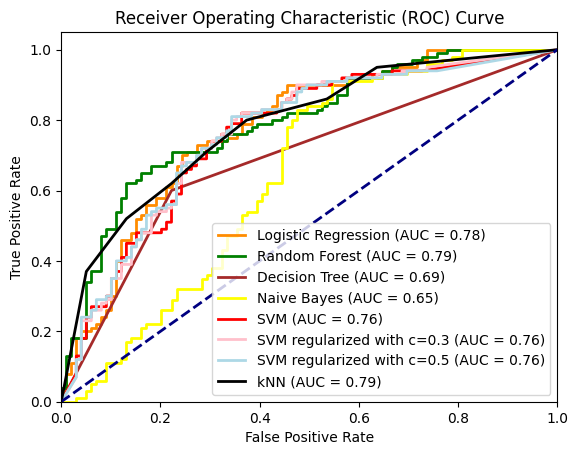

In [134]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Kats Fractal Dimension

**Real Dataset**

In [135]:
use_existing = False

In [136]:
dataset_kfd = []
create_dataset(real_path_patient, dataset_kfd, katz_fd, 1)
create_dataset(real_path_normal, dataset_kfd, katz_fd, 0)


dataset_kfd = np.asarray(dataset_kfd)
print(dataset_kfd[0], '\n', dataset_kfd.shape) 

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:00<00:00, 5600.10it/s]

[2.52582536 2.59757456 2.6396319  2.3636792  2.43598268 2.84284195
 3.04719444 2.83008017 2.50978761 2.62324476 2.56010903 2.40286072
 2.21936104 3.03825119 3.42155563 2.63651955 2.40314976 2.41828866
 2.52859551 1.        ] 
 (199, 20)


**Generated Data**

In [137]:
generated_kfd = []
create_dataset(gen_path_patient, generated_kfd, katz_fd, 1)
create_dataset(gen_path_normal, generated_kfd, katz_fd, 0)


generated_kfd = np.asarray(generated_kfd)
print(generated_kfd[0], '\n', generated_kfd.shape)

100%|██████████| 2000/2000 [00:00<00:00, 5821.93it/s]

[2.2272336  2.09746827 2.04290818 2.01181939 2.00868322 2.06623551
 2.11802796 2.08455001 2.06330966 2.13776088 2.02137433 1.92622276
 1.94574229 2.25472926 2.0430072  2.01843456 2.03307309 2.03988948
 1.99207846 1.        ] 
 (4000, 20)


In [138]:
print("Dataset: ", dataset_kfd.min(), dataset_kfd.max(), dataset_kfd.mean(), dataset_kfd.std(), 
      "\nGenerated:", generated_kfd.min(), generated_kfd.max(), generated_kfd.mean(), generated_kfd.std())

Dataset:  0.0 4.251078664050918 2.3613404229533472 0.5929675966664166 
Generated: 0.0 4.03076334312101 2.3453883651542196 0.5550565785656701


In [139]:
X_train_kfd, y_train_kfd = generated_kfd[:, :-1], generated_kfd[:, -1]
X_test_kfd, y_test_kfd = dataset_kfd[:, :-1], dataset_kfd[:, -1]

In [140]:
# X2 = dataset_kfd[:, :-1]
# y2 = dataset_kfd[:, -1]

# num_samples = len(y2)
# train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# # Randomly select indices for training and testing
# indices = np.arange(num_samples)
# np.random.shuffle(indices)

# train_indices = indices[:train_size]
# test_indices = indices[train_size:]
# # Extract features (X) and output variable (y)

# # Split the data into training and testing sets
# X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
# y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


### Random Forest 

In [141]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.80425
Training Precision: 0.941
Training Recall: 0.7389085198272477
Training F1: 0.8277985484935122
Test Accuracy: 0.7135678391959799
Test Precision: 0.8
Test Recall: 0.6837606837606838
Test F1: 0.7373271889400922


### Feature Selection

In [142]:
print(features_importance := kfd_rf_classifier.feature_importances_)

[0.01645479 0.05073739 0.00897278 0.03771602 0.00841266 0.01502468
 0.03974937 0.00651944 0.04567143 0.01467038 0.05954968 0.09116434
 0.08022913 0.10883141 0.15320237 0.16657989 0.0163304  0.02038991
 0.05979394]


In [143]:
# values = [0.05, 0.2, 0.1, 0.15, -0.3, 0.5, 0.05]

# Threshold
threshold = 0.1

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

In [144]:
indexes

[13, 14, 15]

In [145]:
# X_train_kfd, X_test_kfd = X_train_kfd[:, indexes], X_test_kfd[:, indexes]

### Random Forest Classifier

In [146]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.80825
Training Precision: 0.946
Training Recall: 0.7416699333594668
Training F1: 0.8314656119534168
Test Accuracy: 0.6884422110552764
Test Precision: 0.77
Test Recall: 0.6637931034482759
Test F1: 0.7129629629629629


### Logistic Regression

In [147]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

LogisticRegression()
Training Accuracy: 0.93125
Training Precision: 0.9335
Training Recall: 0.929318068690891
Training F1: 0.9314043402344724
Test Accuracy: 0.6834170854271356
Test Precision: 0.69
Test Recall: 0.6831683168316832
Test F1: 0.6865671641791045


### Decision Tree

In [148]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6331658291457286
Test Precision: 0.58
Test Recall: 0.651685393258427
Test F1: 0.6137566137566137


### Naive Bayes

In [149]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
# kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

GaussianNB()
Training Accuracy: 0.625
Training Precision: 0.7285
Training Recall: 0.6035625517812759
Training F1: 0.6601721794290892
Test Accuracy: 0.6884422110552764
Test Precision: 0.8
Test Recall: 0.6557377049180327
Test F1: 0.7207207207207207


### SVM

In [150]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.97775
Training Precision: 0.9755
Training Recall: 0.9799095931692616
Training F1: 0.9776998246053621
Test Accuracy: 0.6582914572864321
Test Precision: 0.79
Test Recall: 0.626984126984127
Test F1: 0.6991150442477876


In [151]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.97575
Training Precision: 0.9745
Training Recall: 0.9769423558897243
Training F1: 0.9757196495619525
Test Accuracy: 0.6633165829145728
Test Precision: 0.78
Test Recall: 0.6341463414634146
Test F1: 0.6995515695067265


In [152]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.97625
Training Precision: 0.9735
Training Recall: 0.9788838612368024
Training F1: 0.9761845073953371
Test Accuracy: 0.6532663316582915
Test Precision: 0.78
Test Recall: 0.624
Test F1: 0.6933333333333334


### K Nearest Neighbors

In [153]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.9805
Training Precision: 0.979
Training Recall: 0.9819458375125376
Training F1: 0.9804707060590886
Test Accuracy: 0.7035175879396985
Test Precision: 0.79
Test Recall: 0.6752136752136753
Test F1: 0.728110599078341


### Ensemble

In [154]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [155]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


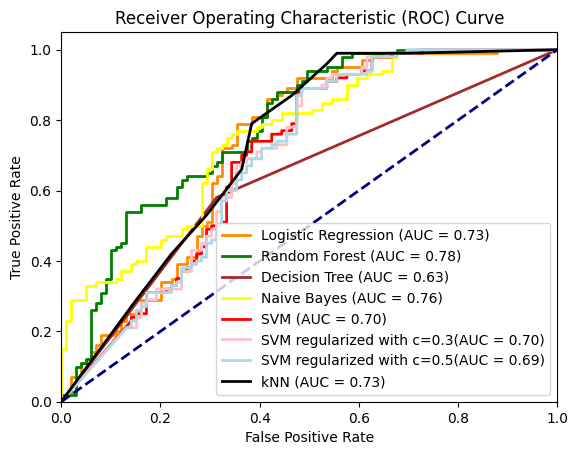

In [156]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# EEGNet

In [157]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import os

In [158]:
batch_size = 32

In [159]:
training_data_control_np = np.load(gen_path_normal)
training_data_patient_np = np.load(gen_path_patient)

labels_control = np.zeros(training_data_control_np.shape[0])  # Label for controls is 0
labels_patient = np.ones(training_data_patient_np.shape[0])   # Label for patients is 1


training_data_np = np.concatenate((training_data_control_np,training_data_patient_np), axis=0)
labels_np = np.concatenate((labels_control, labels_patient), axis=0)

data_tensor = torch.Tensor(training_data_np)
labels_tensor = torch.LongTensor(labels_np)  # Use LongTensor for labels

# Since the discriminator expects flat input, flatten the data if necessary
data_tensor = data_tensor.view(data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [160]:
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)

val_labels_control = np.zeros(real_data_control.shape[0])  # Label for controls is 0
val_labels_patient = np.ones(real_data_patient.shape[0])   # Label for patients is 1

validation_data_np = np.concatenate((real_data_control,real_data_patient), axis=0)
val_labels_np = np.concatenate((val_labels_control, val_labels_patient), axis=0)

validation_data_tensor = torch.Tensor(validation_data_np)
val_tensor = torch.LongTensor(val_labels_np) #, dtype=torch.float32) #.dtype(torch.float) 

# Since the discriminator expects flat input, flatten the data if necessary
validation_data_tensor = validation_data_tensor.view(validation_data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
validation_dataset = TensorDataset(validation_data_tensor, val_tensor)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)


In [161]:
validation_data_np.shape,val_labels_np.shape

((199, 19, 500), (199,))

In [162]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from modules.EEGNET import EEGNetClassifier

test_validity = False

if not test_validity:
    model = EEGNetClassifier().cuda()
else:
    class SimpleNet(nn.Module):
        def __init__(self, input_channels=1, num_classes=1):
            super(SimpleNet, self).__init__()
            self.conv1 = nn.Conv2d(input_channels, 1, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.fc = nn.Linear(9500, num_classes)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            # Input x should have shape: (batch_size, input_channels, sequence_length)
            x = self.conv1(x)
            x = self.relu(x)
            # Flatten before fully connected layer
            x = x.view(x.size(0), -1)
            x = self.fc(x)
            x = self.sigmoid(x)
            return x
    model = SimpleNet().cuda()

In [163]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 25 

In [164]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    model.train()
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())

        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")
    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Val Loss: {sum(val_losses)/len(val_losses)} Val Accuracy: {val_accuracy}\033[0m")
            

Epoch 0 Loss: 0.05624788999557495 : 100%|██████████| 125/125 [00:36<00:00,  3.41it/s]


Epoch 0 Training Loss: 0.2378507608473301 Val Loss: 0.007131846754678658 Val Accuracy: 1.0


Epoch 1 Loss: 0.09802435338497162 : 100%|██████████| 125/125 [00:37<00:00,  3.36it/s] 


Epoch 1 Training Loss: 0.09349703454226256 Val Loss: 0.0025317917710968424 Val Accuracy: 1.0


Epoch 2 Loss: 0.0598750002682209 : 100%|██████████| 125/125 [00:36<00:00,  3.41it/s]  


Epoch 2 Training Loss: 0.06769896007329225 Val Loss: 0.0022723128786310554 Val Accuracy: 1.0


Epoch 3 Loss: 0.017748327925801277 : 100%|██████████| 125/125 [00:13<00:00,  9.56it/s]


Epoch 3 Training Loss: 0.05108558867871761 Val Loss: 0.0016276288079097867 Val Accuracy: 1.0


Epoch 4 Loss: 0.0070663997903466225 : 100%|██████████| 125/125 [00:01<00:00, 95.65it/s]


Epoch 4 Training Loss: 0.036364640474319455 Val Loss: 0.0009644727521975126 Val Accuracy: 1.0


Epoch 5 Loss: 0.005005221348255873 : 100%|██████████| 125/125 [00:01<00:00, 98.83it/s] 


Epoch 5 Training Loss: 0.03129618725925684 Val Loss: 0.0005727990896307997 Val Accuracy: 1.0


Epoch 6 Loss: 0.0029712629038840532 : 100%|██████████| 125/125 [00:01<00:00, 98.49it/s]


Epoch 6 Training Loss: 0.026274947391822935 Val Loss: 0.000527085511878665 Val Accuracy: 1.0


Epoch 7 Loss: 0.01119083072990179 : 100%|██████████| 125/125 [00:01<00:00, 92.21it/s]  


Epoch 7 Training Loss: 0.01957580812461674 Val Loss: 0.0006656918142523084 Val Accuracy: 1.0


Epoch 8 Loss: 0.03629516437649727 : 100%|██████████| 125/125 [00:01<00:00, 94.45it/s]  


Epoch 8 Training Loss: 0.015150744545273483 Val Loss: 0.00033135011368098536 Val Accuracy: 1.0


Epoch 9 Loss: 0.0012194628361612558 : 100%|██████████| 125/125 [00:01<00:00, 95.98it/s]


Epoch 9 Training Loss: 0.012490061913616955 Val Loss: 0.00030099698882882616 Val Accuracy: 1.0


Epoch 10 Loss: 0.017312344163656235 : 100%|██████████| 125/125 [00:01<00:00, 93.36it/s] 


Epoch 10 Training Loss: 0.011769556398503482 Val Loss: 0.00048332590501688955 Val Accuracy: 1.0


Epoch 11 Loss: 0.006052420474588871 : 100%|██████████| 125/125 [00:01<00:00, 86.53it/s] 


Epoch 11 Training Loss: 0.010765867329202592 Val Loss: 0.0002491184235883078 Val Accuracy: 1.0


Epoch 12 Loss: 0.005628482438623905 : 100%|██████████| 125/125 [00:01<00:00, 86.62it/s] 


Epoch 12 Training Loss: 0.009126556261675432 Val Loss: 0.0001725856470459673 Val Accuracy: 1.0


Epoch 13 Loss: 0.0018519849982112646 : 100%|██████████| 125/125 [00:01<00:00, 89.27it/s]


Epoch 13 Training Loss: 0.007891803766600787 Val Loss: 0.00014083177926035466 Val Accuracy: 1.0


Epoch 14 Loss: 0.007211826741695404 : 100%|██████████| 125/125 [00:01<00:00, 89.57it/s] 


Epoch 14 Training Loss: 0.0073773503981065 Val Loss: 0.0002498747593823022 Val Accuracy: 1.0


Epoch 15 Loss: 0.004985263105481863 : 100%|██████████| 125/125 [00:01<00:00, 89.05it/s]  


Epoch 15 Training Loss: 0.0063926610269118105 Val Loss: 0.0004379996098577976 Val Accuracy: 1.0


Epoch 16 Loss: 0.003482415806502104 : 100%|██████████| 125/125 [00:01<00:00, 87.25it/s]  


Epoch 16 Training Loss: 0.005773064811713993 Val Loss: 0.00011073503511787359 Val Accuracy: 1.0


Epoch 17 Loss: 0.0006065628258511424 : 100%|██████████| 125/125 [00:01<00:00, 88.15it/s]


Epoch 17 Training Loss: 0.005662108622025698 Val Loss: 0.0002055170860850402 Val Accuracy: 1.0


Epoch 18 Loss: 0.0015289800940081477 : 100%|██████████| 125/125 [00:01<00:00, 81.19it/s] 


Epoch 18 Training Loss: 0.00615898358321283 Val Loss: 0.00023292052719625644 Val Accuracy: 1.0


Epoch 19 Loss: 0.0021028448827564716 : 100%|██████████| 125/125 [00:01<00:00, 82.89it/s] 


Epoch 19 Training Loss: 0.005390884906402789 Val Loss: 0.00012500170097544988 Val Accuracy: 1.0


Epoch 20 Loss: 0.004527087323367596 : 100%|██████████| 125/125 [00:01<00:00, 86.76it/s]  


Epoch 20 Training Loss: 0.007002105838968419 Val Loss: 0.00014882505300712573 Val Accuracy: 1.0


Epoch 21 Loss: 0.0006224768003448844 : 100%|██████████| 125/125 [00:32<00:00,  3.82it/s] 


Epoch 21 Training Loss: 0.0057140556943486446 Val Loss: 0.00013864528071800514 Val Accuracy: 1.0


Epoch 22 Loss: 0.000890491355676204 : 100%|██████████| 125/125 [00:36<00:00,  3.39it/s]  


Epoch 22 Training Loss: 0.006153470896417275 Val Loss: 0.00013785008448914077 Val Accuracy: 1.0


Epoch 23 Loss: 0.003948986995965242 : 100%|██████████| 125/125 [00:37<00:00,  3.37it/s]  


Epoch 23 Training Loss: 0.005657271014468278 Val Loss: 0.00013139027448362737 Val Accuracy: 1.0


Epoch 24 Loss: 0.00471967039629817 : 100%|██████████| 125/125 [00:37<00:00,  3.33it/s]   


Epoch 24 Training Loss: 0.002878684193303343 Val Loss: 9.725285495473404e-05 Val Accuracy: 1.0


# EEGNet Real and Gen Discrimination

In [8]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

In [9]:
batch_size = 32

In [10]:
##
# Load Generated data and combine it
## 
gen_data_control_np = np.load(gen_path_normal)[0:100]
gen_data_patient_np = np.load(gen_path_patient)[0:100]
gen_data_np = np.concatenate((gen_data_control_np, gen_data_patient_np), axis=0)
gen_labels = np.zeros(gen_data_np.shape[0])  # Label for controls is 0

##
# Load real data and combine it
##
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)
real_data_np = np.concatenate((real_data_control, real_data_patient), axis=0)
real_labels = np.ones(real_data_np.shape[0])   # Label for patients is 1

# combine real and generated data
dataset = np.concatenate((gen_data_np,real_data_np), axis=0)
labels_dataset = np.concatenate((gen_labels,real_labels), axis=0)

train_data, val_data, train_labels, val_labels = train_test_split(
    dataset, labels_dataset, test_size=0.2, random_state=42, stratify=labels_dataset
)

# Convert data to tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.LongTensor(train_labels)
val_data_tensor = torch.Tensor(val_data)
val_labels_tensor = torch.LongTensor(val_labels)

# Reshape to the expected input format
train_data_tensor = train_data_tensor.view(train_data_tensor.size(0), 1, 19, 500)
val_data_tensor = val_data_tensor.view(val_data_tensor.size(0), 1, 19, 500)

# Create TensorDatasets
train_tensor_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
val_tensor_dataset = TensorDataset(val_data_tensor, val_labels_tensor)

# Create DataLoaders
batch_size = 32  # Example batch size; modify as needed
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size, shuffle=False)

In [11]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from modules.EEGNET import EEGNetClassifier
model = EEGNetClassifier().cuda()

In [12]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 1000

In [15]:
from tqdm import tqdm
highest_val_acc = -np.inf

for epoch in tqdm(range(num_epochs)):
    # pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    correct = 0
    total = 0
    for batch, labels in train_loader:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        pred_calc = (predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
        correct += (pred_calc == labels.int()).sum().item()
        total += labels.size(0)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())
        # val_losses.append(val_loss.item())
        # pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    if val_accuracy > highest_val_acc:
        highest_val_acc=val_accuracy
    # accuracy = correct / total if total > 0 else 0.0
print(highest_val_acc)
# print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Validation Loss: {sum(val_losses)/len(val_losses)} Training Accuracy: {accuracy} Validation Accuracy: {val_accuracy}\033[0m")

 10%|▉         | 95/1000 [00:03<00:29, 30.81it/s]


KeyboardInterrupt: 